In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import LSODA, solve_ivp
from numpy.linalg import solve, inv
import numba
import sys


sys.path.append('../Numerical_methods')
from matrix_calculator import A_matrix
from scheme_calculator import forward_backward
from bachelor_funcs import analytic_green, get_first_dev, r_array
from ODE_schemes import A_matrix_regular

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

$$\frac{\partial\Sigma}{\partial t}  
= \frac{3}{r} \frac{\partial}{\partial r}
\left[r^{1/2} \frac{\partial}{\partial r}(\nu\Sigma r^{1/2})\right] 
$$
$$X \equiv 2r^{1/2}, \quad f \equiv \frac{3}{2}\Sigma X$$

$$\Rightarrow \frac{\partial f}{\partial t}=\frac{12\nu}{X^2}\frac{\partial^2f}{\partial X^2}$$

$$r_0 = 1\quad\nu=1$$ 

In [7]:
# r = r/r0 = r

N = 2001
r_i = 0.01
r_f = 2.1
r = np.linspace(r_i, r_f, N)
Δr = r[1] - r[0]
Δt = 0.004

Σ_initial = analytic_green(r, 0.006)

In [16]:
X = 2 * r**(1/2)
ΔX = X[1] - X[0]

D = A_matrix(4, 2, N) / ΔX**2

In [25]:
def time_diff(t, f):
    f_x1 = np.zeros(N)
    f_x2 = np.zeros(N)
   
   #Estimating 1. deriavative with Central finite difference scheme
    f_x1[1 : -1] = (-0.5 * f[:-2] + 0.5 * f[2:]) / ΔX

    boundary = - f / X

    f_x1[0] = boundary[0]
    f_x1[-1] = boundary[-1]

    #Estimating 2. deriavative from 1. derivative
    f_x2[1 : -1] = (-0.5 * f_x1[:-2] + 0.5 * f_x1[2:]) / ΔX

    #f_x2[0] = (-3/2*f_x1[0] + 2 * f_x1[1] - 1/2 * f_x1[2]) / ΔX

    #f_x2[-1] = (1/2*f_x1[-3] - 2 * f_x1[-2] + 3/2 * f_x1[-1]) / ΔX
    
    return X**(-2) * f_x2   

In [26]:
times = np.arange(0.008, 2 + Δt, Δt) / 12

sol = solve_ivp(time_diff, [times[0], times[-1]], y0 = 3/2 * Σ_initial * r**(1/2), t_eval = times, method = 'LSODA')

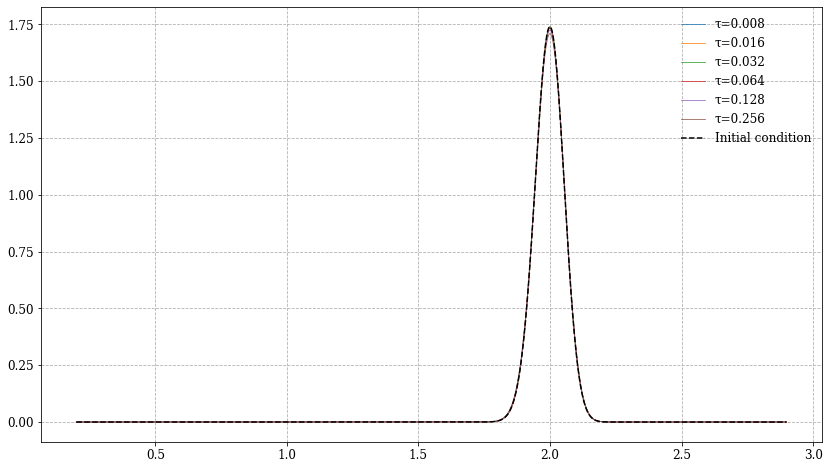

In [27]:
fig, axs = plt.subplots(figsize=(14,8))
axs.grid(ls = '--')


plot_times = [0.008, 0.016, 0.032, 0.064, 0.128, 0.256]
for τ in plot_times:
    axs.plot(X, sol.y[:, (sol.t*12) == τ], label=f'τ={τ}', lw=0.75)


axs.plot(X, 3/2 * Σ_initial * r**(1/2), label='Initial condition', c='black', ls='--')
plt.legend(frameon = False)